#  OpenBB and Python
 ---

This project will look at using the OpenBB SDK and a few of its powerful functions to quickly access data on the DIA ETF.  The OpenBB SDK is an open source python library that allows the end user to access and analyze vast amount of financial data. OpenBB documentation can be found at: https://docs.openbb.co/

In [26]:
# Import Dependencies
from openbb_terminal.sdk import openbb

##  Select an ETF to Examine
 ---

Here we will look at a specific etf to begin the analysis. The etf selected is the DIA, which represents the Dow Jones Industrial Average (DJIA), one of the most watched stock indicies by investors and financial professionals.  The DIA is comprised of 30 stocks, lets see what stocks actually make up the DIA .... 

In [27]:
# Look at the holdings of an etf --> DIA
openbb.etf.holdings("DIA")

,Name,% Of Etf,Shares
Symbol,,,
UNH,UnitedHealth Group Incorporated,9.52%,5711694
GS,"The Goldman Sachs Group, Inc.",6.84%,5711694
HD,"The Home Depot, Inc.",6.18%,5711694
MCD,McDonald's Corporation,5.28%,5711694
AMGN,Amgen Inc.,5.11%,5711694
CAT,Caterpillar Inc.,4.95%,5711694
MSFT,Microsoft Corporation,4.75%,5711694
V,Visa Inc.,4.39%,5711694
BA,The Boeing Company,4.11%,5711694


###  Some interesting points to note: 
 ---
Notice that when we call the etf.holdings function from OpenBB on the DIA, it returns all of the stocks (30) that make up the index sorted by %weight in the index! Pretty cool! We can easily see that UNH is the largest weight currently in the DIA

##  Dive Into DIA!!
 ---

### Now we will start to dive into the DIA etf and see what data we can examine.  First up .. lets get an overview of the etf

In [28]:
# Bring in the etf to dataframe called symbols
symbols = openbb.etf.holdings("DIA")

# Create a list of all the symbols from the DIA ETF, dropping any index that may have N/A
dia_symbols = list(symbols.index.drop(["N/A"]))

# Bring in overview data with stocks.ca.screener & combine with dia symbols into a dataframe called dia_overview
# Here if we had a list of stocks wanted to compare. can change the similar variable, current is just DIA to DIA to see all DIA data
dia_overview = openbb.stocks.ca.screener(similar = dia_symbols, data_type = "overview")  #https://docs.openbb.co/sdk/reference/stocks/ca/screener

# Sort the dataframe by stock price, highest price first
dia_overview = dia_overview.sort_values(by = ["Price"], ascending = False)#.convert_dtypes() --> changes the market cap column
dia_overview
#dia_overview.head(5)

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
25,UNH,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,USA,4.517200e+11,22.93,489.00,0.0066,1372023.0
10,GS,"The Goldman Sachs Group, Inc.",Financial,Capital Markets,USA,1.213100e+11,11.61,348.42,-0.0020,1472328.0
11,HD,"The Home Depot, Inc.",Consumer Cyclical,Home Improvement Retail,USA,3.173300e+11,19.01,316.53,0.0033,1000745.0
18,MCD,McDonald's Corporation,Consumer Cyclical,Restaurants,USA,1.935600e+11,33.92,268.01,-0.0048,1454012.0
1,AMGN,Amgen Inc.,Healthcare,Drug Manufacturers - General,USA,1.386100e+11,20.91,259.17,-0.0069,742571.0
4,CAT,Caterpillar Inc.,Industrials,Farm & Heavy Construction Machinery,USA,1.294200e+11,18.46,257.43,0.0187,1563134.0
21,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,USA,1.745900e+12,26.14,241.91,-0.0028,14586828.0
26,V,Visa Inc.,Financial,Credit Services,USA,4.541500e+11,32.02,224.82,0.0029,3174949.0
3,BA,The Boeing Company,Industrials,Aerospace & Defense,USA,1.253400e+11,NaN,210.62,0.0031,2395145.0
12,HON,Honeywell International Inc.,Industrials,Specialty Industrial Machinery,USA,1.365300e+11,26.15,206.89,0.0119,1315106.0


Pretty quick way to get a Pandas dataframe that is a nice overview of the DIA!! Lets dig a little deeper .. 

---
### What if we were interested in valuation data of the stocks in DIA?? ...

In [29]:
# Bring in valuation data with stocks.ca.screener & combine with dia symbols into a dataframe called dia_valuation

dia_valuation = openbb.stocks.ca.screener(similar = dia_symbols, data_type = "valuation")  

# Sort the dataframe by stock price, highest price first
dia_valuation = dia_valuation.sort_values(by = ["Price"], ascending = False)
dia_valuation

,Ticker,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
25,UNH,4.517200e+11,22.93,17.17,1.64,1.39,6.08,11.63,30.50,0.128,0.1344,0.201,0.1396,0.092,488.76,0.0061,1385449.0
10,GS,1.213100e+11,11.61,8.61,NaN,1.77,1.13,0.43,NaN,1.403,0.1753,0.296,-0.0169,0.113,348.67,-0.0013,1478187.0
11,HD,3.173300e+11,19.01,18.68,3.84,2.02,248.41,128.89,122.81,0.301,0.0139,0.192,0.0495,0.098,316.61,0.0036,1007786.0
18,MCD,1.935600e+11,33.92,25.55,5.06,8.32,NaN,68.44,113.29,0.591,0.0578,0.130,0.0671,-0.012,268.07,-0.0045,1459589.0
1,AMGN,1.386100e+11,20.91,14.08,3.70,5.26,38.21,12.08,28.57,-0.165,0.0496,0.001,0.0565,0.025,259.16,-0.0069,746338.0
4,CAT,1.294200e+11,18.46,16.52,1.20,2.29,8.51,20.39,47.37,1.212,0.0997,1.535,0.1535,0.058,257.61,0.0194,1582163.0
21,MSFT,1.745900e+12,26.14,21.79,2.03,8.60,10.42,16.28,38.98,0.198,0.1609,0.243,0.1288,0.155,241.87,-0.0029,14692082.0
26,V,4.541500e+11,32.02,23.34,2.15,15.49,13.99,24.52,30.95,0.245,0.1586,0.201,0.1492,0.098,224.88,0.0031,3181763.0
3,BA,1.253400e+11,NaN,88.26,NaN,2.04,NaN,8.79,NaN,0.658,1.2670,-0.238,NaN,-0.078,210.52,0.0026,2420971.0
12,HON,1.365300e+11,26.15,22.35,3.33,3.91,7.78,17.14,66.24,0.178,0.0408,0.050,0.0785,-0.026,207.04,0.0126,1319599.0


P/E, Forward P/E, EPS  .... Just by changing a single parameter in the screener function we return a bunch of valuation related data on the entire index!!

---
### What if you were wondering ... well how are these stocks doing now?  ......

In [30]:
# Bring in performance data with stocks.ca.screener & combine with dia symbols into a dataframe called dia_performance

dia_performance = openbb.stocks.ca.screener(similar = dia_symbols, data_type = "performance")  

# Sort the dataframe by stock price, highest price first
dia_performance = dia_performance.sort_values(by = ["Price"], ascending = False)
dia_performance

,Ticker,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD,Volatility W,Volatility M,Recom,Avg Volume,Rel Volume,Price,Change,Volume
25,UNH,-0.0077,-0.0661,-0.0673,-0.0683,0.0493,-0.0837,0.0207,0.0211,1.8,3330000.0,0.66,488.76,0.0061,1385449.0
10,GS,-0.0665,0.0135,0.1233,0.0778,0.0030,0.0168,0.0374,0.0227,2.3,2700000.0,0.87,348.67,-0.0013,1478187.0
11,HD,-0.0475,0.0020,0.1708,0.0290,-0.0975,-0.0012,0.0283,0.0211,2.2,4060000.0,0.39,316.61,0.0036,1007786.0
18,MCD,0.0015,0.0076,0.0782,0.0602,0.0638,0.0219,0.0217,0.0153,2.0,2910000.0,0.79,268.07,-0.0045,1459589.0
1,AMGN,-0.0396,-0.0143,0.0546,0.0611,0.1401,-0.0064,0.0178,0.0164,2.7,2700000.0,0.44,259.16,-0.0069,746338.0
4,CAT,-0.0223,0.0747,0.3997,0.4147,0.1665,0.0549,0.0224,0.0204,2.6,3240000.0,0.77,257.61,0.0194,1582163.0
21,MSFT,0.0140,0.0032,0.0272,-0.0683,-0.1957,0.0115,0.0232,0.0238,1.8,30730000.0,0.76,241.87,-0.0029,14692082.0
26,V,0.0050,0.0916,0.1974,0.0490,0.0459,0.0790,0.0170,0.0169,1.9,7040000.0,0.71,224.88,0.0031,3181763.0
3,BA,-0.0194,0.1151,0.5092,0.3276,-0.0197,0.1023,0.0200,0.0270,2.0,7690000.0,0.50,210.52,0.0026,2420971.0
12,HON,-0.0561,-0.0332,0.1510,0.1267,-0.0213,-0.0459,0.0240,0.0188,2.3,3120000.0,0.67,207.04,0.0126,1319599.0


WOW!! pretty quick and simple change to the function to get an entirly new dataframe of how all the Dow Stocks are doing ... weekly, monthly etc. 

---
### But hey ... what have you done for me lately DIA? :) ... lets look at the week and get an idea of whats going on

In [31]:
# Slice out the weeks performance, put it in a df called wk_performance and sort it out
wk_performance = dia_performance.iloc[:, 0:2]
wk_performance.set_index("Ticker", inplace=True)
wk_performance.sort_values(by=("Perf Week"), ascending=False, inplace=True)
wk_performance

,Perf Week
Ticker,
DIS,0.0633
AAPL,0.0471
CRM,0.0425
CVX,0.0175
MSFT,0.0140
INTC,0.0053
V,0.0050
MCD,0.0015
WBA,-0.0030


---
## Thats all well and good but these tables are getting a little old .....

<AxesSubplot: title={'left': 'Week of Performance of the DIA Stocks'}, xlabel='Ticker'>

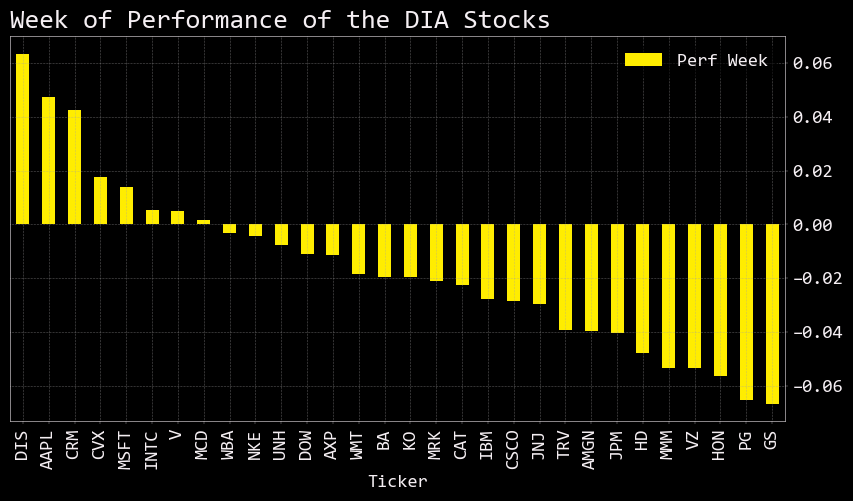

In [32]:
# Plot the weeks performance of the 30 stocks in bar format
wk_performance.plot(kind="bar", figsize=(10, 5), title = "Week of Performance of the DIA Stocks")

WOW!! Much better ... now we can see the leaders and laggards of the index 

---
### Looks like GS is having a rough week ... I wonder why?? Lets see what the news is saying ...

In [33]:
# Use the news function to search for why GS is down
gs_news = openbb.news(term = "Goldman Sachs drop")
gs_news.sort_index()

Fetching data. Please be patient

,title,link,published
0,Goldman misses profit estimates as dealmaking ...,https://news.google.com/__i/rss/rd/articles/CB...,2023-01-17 20:15:00+00:00
1,"Goldman Sachs misses its earnings estimate, wh...",https://news.google.com/__i/rss/rd/articles/CB...,2023-01-17 13:26:00+00:00
2,Goldman Sachs reports 69% drop in Q4 profit - ...,https://news.google.com/__i/rss/rd/articles/CB...,2023-01-17 12:22:59+00:00
3,Goldman Sachs Could See Profits Drop by 50% - ...,https://news.google.com/__i/rss/rd/articles/CB...,2023-01-13 08:00:00+00:00
4,Goldman Sachs reports 69% drop in Q4 profit - ...,https://news.google.com/__i/rss/rd/articles/CB...,2023-01-17 12:45:00+00:00
...,...,...,...
95,BHEL Shares Fall After Goldman Sachs Maintains...,https://news.google.com/__i/rss/rd/articles/CB...,2022-11-14 08:00:00+00:00
96,Goldman Sachs Faces Fed Scrutiny of Money-Losi...,https://news.google.com/__i/rss/rd/articles/CB...,2022-09-16 07:00:00+00:00
97,Dell Stock Slides As Goldman Sachs Drops From ...,https://news.google.com/__i/rss/rd/articles/CB...,2022-04-01 07:00:00+00:00
98,Goldman’s Apple Card business has a surprising...,https://news.google.com/__i/rss/rd/articles/CB...,2022-09-12 07:00:00+00:00


Ahhh .... Looks like GS had some misses around earnings ... 

---
### OK, enough with the laggards ... looks like DIS had a great week, I might want to invest in that stock, whats that been up to?

Loading Daily data for DIS with starting period 2020-01-21.

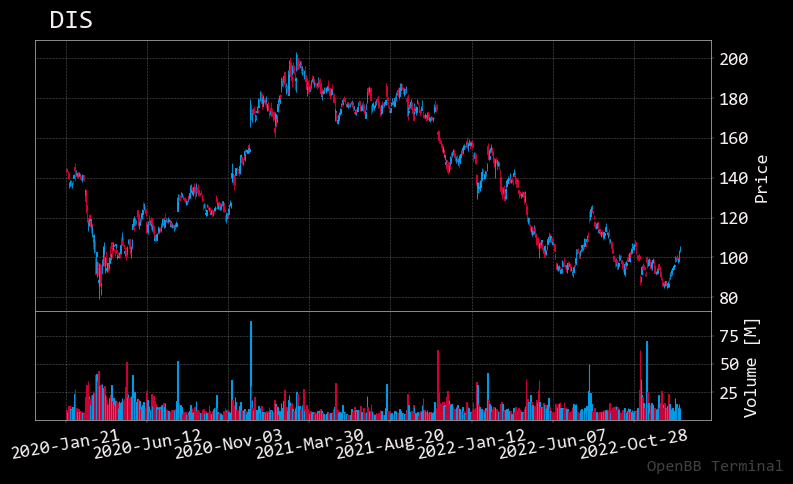

In [34]:
# Grab a quick 3yr daily chart of DIS with a single line of code
openbb.stocks.candle("DIS")


---
### Looks like it may have found some support around that 80 level and is possibly starting a rally, I'm interested ... I'd like to look at a closer more recent view though ....

Loading Intraday 30min data for DIS with starting period 2022-11-26.

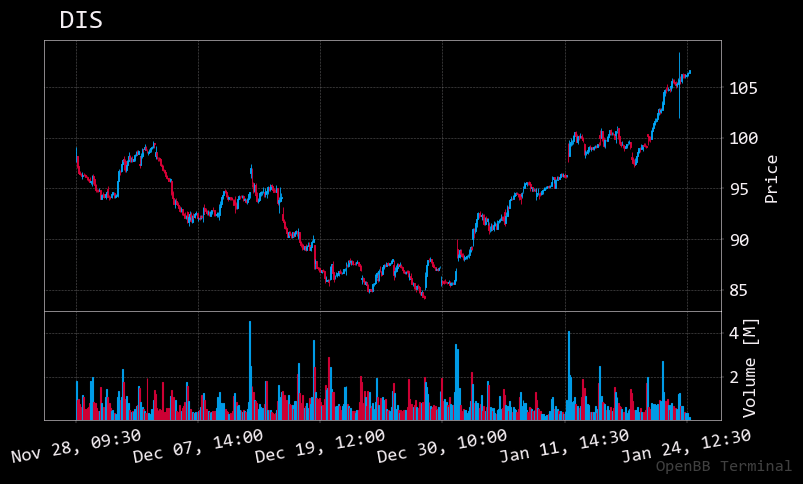

In [35]:
# Grab a quick 60days of data on a 30min basis
openbb.stocks.candle("DIS", interval = 30)

---
### Very interesting, I think I'd like to perform some more quantitative analysis before investing though, I'll save that for a future project!